In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

## Data Preparation

In [2]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Both_leg_c3c4_2019-01-26_18-25-42.txt", sep=',', names=colNames)

In [3]:
data = data[6:]

In [4]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-132.30,104.38,195.25,-3044.75,0.0,0.0,0.0,18:26:25.962
7,1,-112.31,102.88,198.17,-2990.31,0.0,0.0,0.0,18:26:25.977
8,2,-92.29,105.19,187.89,-2972.62,0.0,0.0,0.0,18:26:25.977
9,3,-111.59,115.72,190.46,-3013.23,0.0,0.0,0.0,18:26:25.992
10,4,-125.89,113.52,199.76,-3052.43,0.0,0.0,0.0,18:26:25.992


## Time Domain Analysis

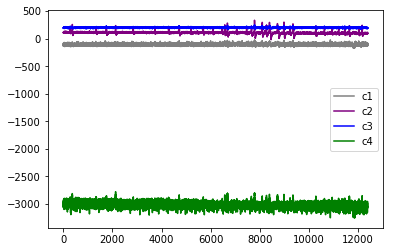

In [5]:
plt.plot(data['c1'],'grey')
plt.plot(data['c2'],'purple')
plt.plot(data['c3'],'blue')
plt.plot(data['c4'],'green')
plt.legend()

plt.show()

## Frequency Domain Analysis

In [6]:
# plt.plot(np.log(fft(sig[:20])))

In [7]:
data.shape

(12377, 9)

In [8]:
X = np.array(data.ix[250:, 1:5])
X.shape

/home/krohak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(12133, 4)

In [9]:
X

array([[ -127.37,   115.25,   193.95, -3042.43],
       [ -110.26,   112.39,   187.25, -3011.81],
       [ -101.67,   111.36,   193.69, -2920.45],
       ..., 
       [ -132.66,    96.71,   196.95, -3052.75],
       [ -106.58,    94.19,   198.05, -2961.63],
       [  -87.91,   100.22,      nan,      nan]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [10]:
freq, y = signal.welch(X.T, fs=200.0) 

In [11]:
y = y.T

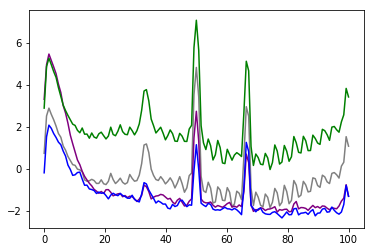

In [12]:
color = ['grey', 'purple', 'blue', 'green']
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1), c=color[i])

** Alpha waves!! ** 

## Spectrogram Analysis

In [13]:
data.shape

(12377, 9)

In [14]:
X = np.array(data.ix[250:, 1:5])
X.shape

(12133, 4)

In [15]:
sig = X[:, 0]

In [16]:
sig.shape

(12133,)

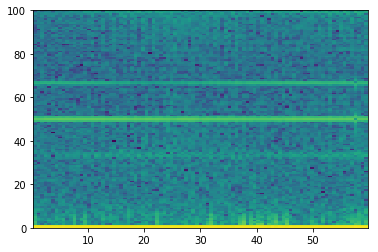

In [17]:
_ = plt.specgram(sig, NFFT=256, Fs=200.0)

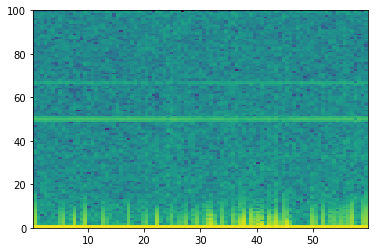

In [18]:
sig = X[:, 1]
_ = plt.specgram(sig, NFFT=256, Fs=200.0) # sampling rate is 200hz

In [19]:
# sig = X[:, 1]
# _ = plt.specgram(sig, NFFT=1024, Fs=200.0) # sampling rate is 200hz

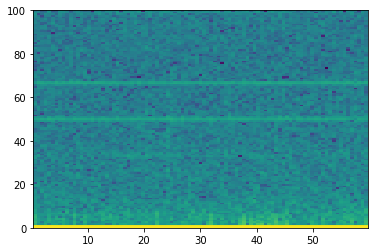

In [20]:
sig = X[:, 2]
_ = plt.specgram(sig, Fs=200.0)

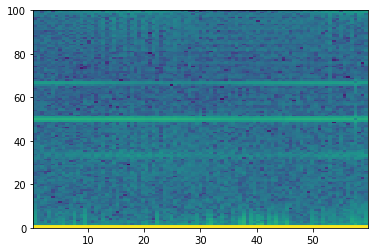

In [21]:
sig = X[:, 3]
_ = plt.specgram(sig, Fs=200.0)